# Name:Radhika Pande

### Project 3: Operation successful or not-Kyphosis

DecisionTree and NB is used in this case,but decision tree will show less accuracy,so,NB is preferred.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('kyphosis.csv')
df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [4]:
df.shape

(81, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


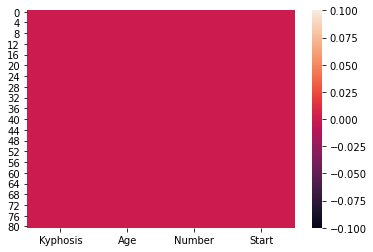

In [6]:
sns.heatmap(df.isnull())

In [7]:
X=df.values[:,1:]
X

array([[71, 3, 5],
       [158, 3, 14],
       [128, 4, 5],
       [2, 5, 1],
       [1, 4, 15],
       [1, 2, 16],
       [61, 2, 17],
       [37, 3, 16],
       [113, 2, 16],
       [59, 6, 12],
       [82, 5, 14],
       [148, 3, 16],
       [18, 5, 2],
       [1, 4, 12],
       [168, 3, 18],
       [1, 3, 16],
       [78, 6, 15],
       [175, 5, 13],
       [80, 5, 16],
       [27, 4, 9],
       [22, 2, 16],
       [105, 6, 5],
       [96, 3, 12],
       [131, 2, 3],
       [15, 7, 2],
       [9, 5, 13],
       [8, 3, 6],
       [100, 3, 14],
       [4, 3, 16],
       [151, 2, 16],
       [31, 3, 16],
       [125, 2, 11],
       [130, 5, 13],
       [112, 3, 16],
       [140, 5, 11],
       [93, 3, 16],
       [1, 3, 9],
       [52, 5, 6],
       [20, 6, 9],
       [91, 5, 12],
       [73, 5, 1],
       [35, 3, 13],
       [143, 9, 3],
       [61, 4, 1],
       [97, 3, 16],
       [139, 3, 10],
       [136, 4, 15],
       [131, 5, 13],
       [121, 3, 3],
       [177, 2, 14],
     

In [8]:
Y=df.values[:,0]
Y

array(['absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'present', 'present', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'present', 'present', 'absent',
       'present', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'present', 'absent', 'present', 'present', 'absent',
       'absent', 'absent', 'absent', 'present', 'absent', 'absent',
       'present', 'absent', 'absent', 'absent', 'present', 'absent',
       'absent', 'absent', 'absent', 'present', 'absent', 'absent',
       'present', 'present', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'present', 'absent',
       'absent', 'present', 'absent'], dtype=object)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((56, 3), (25, 3), (56,), (25,))

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
pred=dt.predict(X_test)
pred

array(['absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'present', 'absent', 'absent',
       'present', 'absent', 'absent', 'absent', 'present', 'present',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent'], dtype=object)

In [14]:
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      absent       0.80      0.84      0.82        19
     present       0.40      0.33      0.36         6

    accuracy                           0.72        25
   macro avg       0.60      0.59      0.59        25
weighted avg       0.70      0.72      0.71        25



Text(33.0, 0.5, 'predicted')

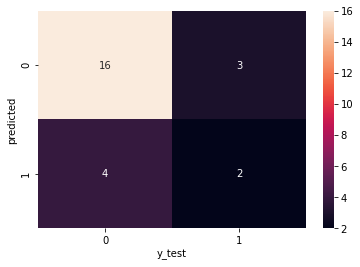

In [16]:
cm=confusion_matrix(y_test,pred)
sns.heatmap(cm,annot=True,fmt="0.0f")
plt.xlabel('y_test')
plt.ylabel('predicted')

The model performed using Decision tree shows us less accuracy . Therefore,we try using NB to train the model.

In [17]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,
          y_train);

In [18]:
pred=model.predict(X_test)
pred

array(['absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'present',
       'absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'absent'], dtype='<U7')

In [19]:
model.score(X_test,y_test)*100

84.0

In [20]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      absent       0.83      1.00      0.90        19
     present       1.00      0.33      0.50         6

    accuracy                           0.84        25
   macro avg       0.91      0.67      0.70        25
weighted avg       0.87      0.84      0.81        25



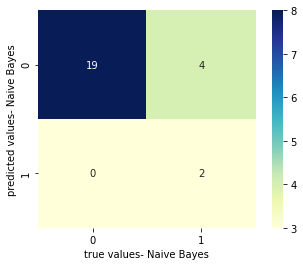

In [21]:
mat = confusion_matrix(y_test, pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
cmap="YlGnBu",vmin=3,vmax=8)
plt.xlabel('true values- Naive Bayes')
plt.ylabel('predicted values- Naive Bayes')
plt.show()

### Conclusion:
The model is having more accuracy when Gaussian Naiv Bayes should be used instead of Decision Tree.